In [1]:
import sys
sys.path.insert(0,"/mnt/c/gitreps/SlowQuant/")
import numpy as np
import time
import matplotlib.pyplot as plt
from slowquant.legacy import shortcuts as SQ

In [2]:
settings    = {'basisset':'3-21G'}
molecule    = np.array([[2,0,0,0],
                        [1,0.0,0.0,0.0],
                        [1,1.0,0.0,0.0]])

In [3]:
# rHH, HFE, UHFE, spin-expectation
data = np.zeros((3,100))

In [4]:
# Calculate the dissociation curve
for i in range(0,100):
    molecule[2,1] = i*0.125 + 0.5
    VNN, VNe, S, Te, Vee = SQ.Integrals(molecule, settings['basisset'])
    EHF, C, F, D = SQ.HartreeFock(molecule, VNN, Te, S, VNe, Vee, print_scf='no')
    EUHF, C_alpha, F_alpha, D_alpha, C_beta, F_beta, D_beta, iterations = SQ.UnrestrictedHartreeFock(molecule, VNN, Te, S, VNe, Vee)
    data[0,i] = molecule[2,1]
    data[1,i] = EHF
    data[2,i] = EUHF

In [5]:
# Calculate the energy for H-
molecule = np.array([[2,0,0,0],
                    [1,0.0,0.0,0.0]])
Hpenergy, C, F, D = SQ.HartreeFock(molecule, VNN, Te, S, VNe, Vee, print_scf='no')

# Calculate the energy for H
molecule = np.array([[1,0,0,0],
                    [1,0.0,0.0,0.0]])
Henergy, C_alpha, F_alpha, D_alpha, C_beta, F_beta, D_beta, iterations = SQ.UnrestrictedHartreeFock(molecule, VNN, Te, S, VNe, Vee)

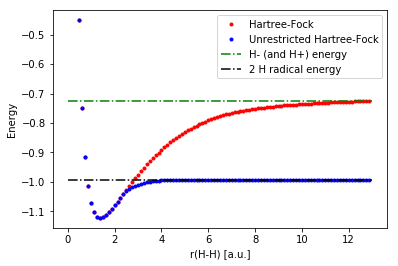

In [6]:
plt.plot(data[0,:], data[1,:], 'r.', label='Hartree-Fock')
plt.plot(data[0,:], data[2,:], 'b.', label='Unrestricted Hartree-Fock')

plt.plot([0.0,13.0], [Hpenergy,Hpenergy], 'g-.', label='H- (and H+) energy')
plt.plot([0.0,13.0], [2*Henergy,2*Henergy], 'k-.', label='2 H radical energy')

plt.legend(loc=1)
plt.ylabel('Energy')
plt.xlabel('r(H-H) [a.u.]')
plt.savefig('H2dissociation.png')
plt.show()